Most derivation follows https://gregorygundersen.com/blog/2022/03/20/conjugate-gradient-descent/

#### Gradient descent

We start with gradient descent for a quadratic function

$$f(x)=\frac{1}{2}x^TAx-b^Tx$$

where $A$ is `positive definite`

If we take gradient w.r.t. $x$ and set it to zero, we have

$$\nabla f(x)=Ax-b=0$$

This means

* $x^*$ that minimizes $f(x)$ is also the `solution` to $Ax=b$
* The gradient descent direction, or `search direction` is the `residual` $\boxed{r=b-Ax=-\nabla f(x)}$

We put these into gradient descent framework, at iteration $k$, we have

$$x^{k+1}=x^{k}+\alpha^{k}r^k$$

where $\alpha^{k}$ is the `step size`

We can use `line search` to obtain $\alpha^{k}$

$$\begin{align*}
\alpha^k&= \arg \min_{\alpha>0} f(x^k+\alpha r^k) \\
& \text{let } \Delta =\alpha r^k \text{ and drop superscript for clarity}\\
&=\arg \min_{\alpha>0} f(x+\Delta)\\
&=\arg \min_{\alpha>0} \frac{1}{2}(x+\Delta)^TA(x+\Delta)-b^T(x+\Delta)+c \\
&=\arg \min_{\alpha>0}\frac{1}{2}(x^TAx+x^TA\Delta+\Delta^TAx+\Delta^TA\Delta)-b^T\Delta -b^Tx+c\\
& x^TA\Delta+\Delta^TAx=2x^TA\Delta \text{ since both are scalar} \\
&=\arg \min_{\alpha>0}\frac{1}{2}x^TAx +x^TA\Delta+\frac{1}{2}\Delta^TA\Delta-b^T\Delta -b^Tx+c
\end{align*}$$

We can now take derivative of the expression w.r.t. $\alpha$ and set it to zero (all terms without $\Delta$ will be zero)

$$(x^k)^TAr^k+\alpha(r^k)^TAr^k-b^Tr^k=0$$

Solve this and we get $\alpha^k$

$$\begin{align*}
\alpha^k &= -\frac{(x^k)^TAr^k-b^Tr^k}{(r^k)^TAr^k} \\
& A=A^T \\
&= -\frac{(Ax^k-b)^Tr^k}{(r^k)^TAr^k} \\
& r^k=b-Ax^k \\
&= \boxed{\frac{(r^k)^Tr^k}{(r^k)^TAr^k}} \\
\end{align*}$$

This indicates that the optimal step size leverages both the (negative) gradient $r^k$ and $A$ itself

We notice that if we use this optimal $\alpha^k$, we have

$$\begin{align*}
(r^{k+1})^Tr^k&=\left(b-A(x^k+\alpha^kr^k)\right)^Tr^k\\
& A=A^T \\
&=\left(b-Ax^k\right)^Tr^k-\alpha^k(r^k)^TAr^k\\
&=(r^k)^Tr^k-(r^k)^Tr^k\\
&=0
\end{align*}$$

That is, the new search direction $r^{k+1}$ is `orthogonal` to current search direction $r^k$

##### Example

We can compare when we use empirical step size and when we use optimal step size as derived above

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

In [153]:
def grad_descent(A, b, x_0, alpha=1e-3, opt_alpha=True, tol=1e-6):
    x = x_0
    x_list = [x]
    r_list = []
    while True:
        r = b - A @ x
        if opt_alpha:
            alpha = (r.T @ r) / (r.T @ A @ r)
        else:
            alpha = alpha
        x = x + alpha * r
        if np.linalg.norm(x - x_list[-1]) < tol:
            break
        x_list.append(x)
        r_list.append(r)

    return np.array(x_list), np.array(r_list)

def f(x, A, b):
    return 0.5 * x @ A @ x - b @ x

In [154]:
A = np.array([[4.0, 2],[2, 3]])
b = np.array([1, 2])
x_0 = np.array([1, -3])
alpha = 1e-1
tol = 1e-6

traj_opt, rs_opt = grad_descent(A, b, x_0=x_0, alpha=alpha, opt_alpha=True, tol=tol)
traj_emp, rs_emp = grad_descent(A, b, x_0=x_0, alpha=alpha, opt_alpha=False, tol=tol)
print("Steps to converge (optimal alpha):", len(traj_opt)-1)
print("Steps to converge (empirical alpha):", len(traj_emp)-1)

Steps to converge (optimal alpha): 26
Steps to converge (empirical alpha): 85


In [155]:
# Check any two neighbouring residuals are orthogonal
norms = np.linalg.norm(rs_opt, axis=1, keepdims=True)
rs_opt_norm = rs_opt / norms

norms_emp = np.linalg.norm(rs_emp, axis=1, keepdims=True)
rs_emp_norm = rs_emp / norms_emp

dot_products_opt = np.sum(rs_opt_norm[:-1] * rs_opt_norm[1:], axis=1)
dot_products_emp = np.sum(rs_emp_norm[:-1] * rs_emp_norm[1:], axis=1)

print(dot_products_opt)
print(dot_products_emp)

[-0.0000  0.0000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000  0.0000
 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000 -0.0000
  0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000 -0.0000]
[ 0.9487  0.9615  0.9842  0.9952  0.9986  0.9996  0.9999  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000]


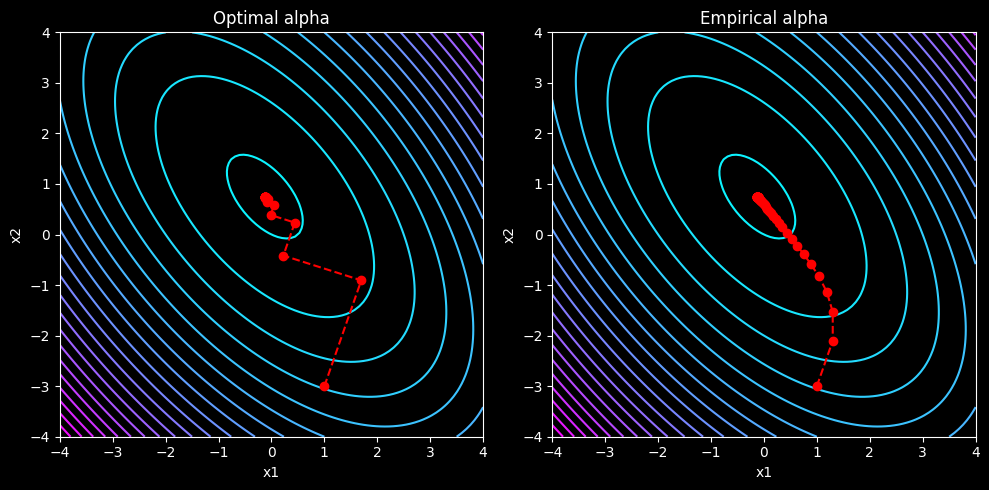

In [156]:
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
fx = np.vectorize(lambda x, y: f(np.array([x, y]), A, b))
Z = fx(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].contour(X, Y, Z, levels=20, cmap='cool')
axes[0].plot(traj_opt[:, 0], traj_opt[:, 1], 'o--', color='red')
axes[0].set_title("Optimal alpha")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

axes[1].contour(X, Y, Z, levels=20, cmap='cool')
axes[1].plot(traj_emp[:, 0], traj_emp[:, 1], 'o--', color='red')
axes[1].set_title("Empirical alpha")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

plt.tight_layout()
plt.show()

#### Conjugate gradient method

The idea of `conjugate gradient` comes from the observation that the optimal alpha in standard gradient descent leads to orthogonal search directions and they do not necessarily point to $x^*$ at each $x^k$. We denote this direction $e^k=x^*-x^k$

At $x^k$, if we take the step $\alpha^kr^k$ to get $x^{k+1}$, we can rewrite $(r^{k+1})^Tr^k$ as

$$\begin{align*}
(r^{k+1})^Tr^k=0&=\left(b-Ax^{k+1}\right)^Tr^k\\
&=\left(A\left(A^{-1}b-x^{k+1}\right)\right)^Tr^k \\
&=\left(A\left(x^*-x^{k+1}\right)\right)^Tr^k \\
&=(e^{k+1})^TAr^k
\end{align*}$$

This means that $e^{k+1}$, which is the direction pointing to $x^*$ from $x^{k+1}$, is `A-orthogonal` to previous gradient $r^k$

For PD matrix with `eigendecomposition` $A=Q\Lambda Q^{T}$, we can write

$$\begin{align*}
x^TAy&=x^TQ\Lambda^{\frac{1}{2}}\Lambda^{\frac{1}{2}} Q^{T}y \\
&=(\Lambda^{\frac{1}{2}}Q^Tx)^T(\Lambda^{\frac{1}{2}}Q^Ty)
\end{align*}$$

That is, $x^TAy$ is equivalent to the dot product of $x$ and $y$ represented as their `expansion` in the eigenvectors of $A$ and `scaled` by square roots of corresponding eigenvalues

The conjugate gradient method seeks to construct a sequence of search directions $d^k$ with each being A-orthogonal to all previous ones

* At iteration k, write `residual` or negative gradient
$$r^k=b-Ax^k$$
* Compute `search direction`
$$d^k=r^k-\sum_{t<k}\beta_{kt}d^t, \beta_{kt}=\frac{(r^k)^TAd^t}{(d^t)^TAd^t}$$
* Use `line search` to minimize $f(x^k+\alpha^kd^k)$ and find `step size`, exactly following derivation in gradient descent
$$\begin{align*}
\alpha^k =\frac{(r^k)^Td^k}{(d^k)^TAd^k} \\
\end{align*}$$
* Update
$$x^{k+1}=x^k+\alpha^kd^k$$

##### Example

In [157]:
def conjugate_grad(A, b, x_0, tol=tol):
    x = x_0
    x_list = [x]
    d_list = []

    for i in range(A.shape[0]):

        r = b - A @ x
        projs = 0
        for k in range(i):
            d_k = d_list[k-1]
            beta_k = (r @ A @ d_k) / (d_k @ A @ d_k)
            projs += beta_k * d_k
        d = r - projs

        alpha = (r @ d) / (d @ A @ d)
        x = x + alpha * d

        if np.linalg.norm(x - x_list[-1]) < tol:
            break

        x_list.append(x)
        d_list.append(d)

    return np.array(x_list), np.array(d_list)

In [158]:
traj_cgd, ds_cgd = conjugate_grad(A, b, x_0=x_0)
print("Steps to converge:", len(traj_cgd)-1)

Steps to converge: 2


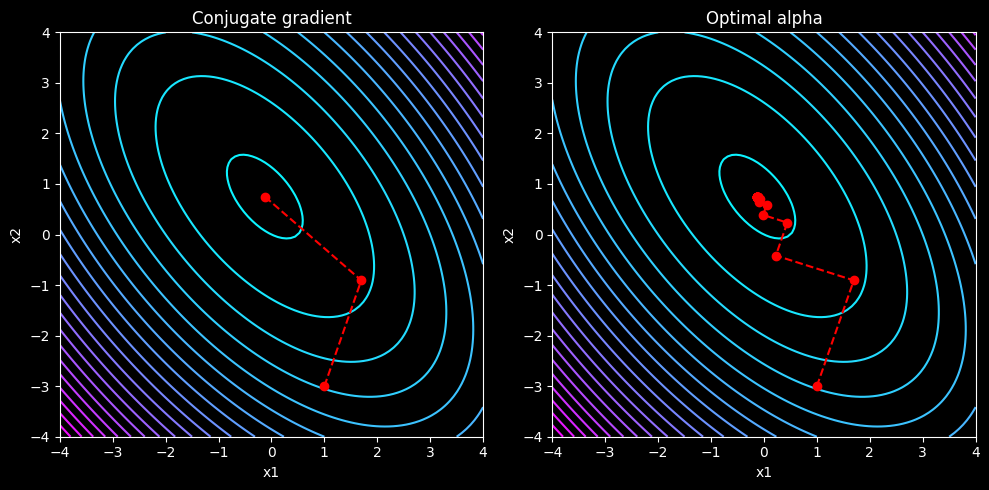

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].contour(X, Y, Z, levels=20, cmap='cool')
axes[0].plot(traj_cgd[:, 0], traj_cgd[:, 1], 'o--', color='red')
axes[0].set_title("Conjugate gradient")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

axes[1].contour(X, Y, Z, levels=20, cmap='cool')
axes[1].plot(traj_opt[:, 0], traj_opt[:, 1], 'o--', color='red')
axes[1].set_title("Optimal alpha")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

plt.tight_layout()
plt.show()

##### Why it works?

We note that if we replace $A$ with the identity matrix, then, the search direction step looks just like the Gram-Schmidt procedure

For each entry in the summation

$$r^k-\sum_{t<k}\beta_{kt}d^t$$

we subtract from $r^k$ its component in the direction of previous search direction $d^t, t<k$ in the eigen-space

Therefore, what is left is the component of $r^k$ that is A-orthogonal to all previous search directions

And we can show that the search directions produced by these steps are indeed A-orthogonal

For $t=0$ and $k=1$, we have $(r^1)^Td^0=0$ and $(d^1)^TAd^0=0$

Assume that we have for up to index $k$

$$(r^k)^Td^t=0, (d^k)^TAd^t=0, \forall t<k$$

we use induction to show that this is also true for $t<k+1$

$$\begin{align*}
(r^{k+1})^Td^t& =(b-Ax^{k+1})^Td^t\\
& =\left(r^k+Ax^k-A\left(x^k+\alpha^kd^k\right)\right)^Td^t\\
&=(r^k-\alpha^kAd^k)^Td^t\\
&=(r^k)^Td^t-\alpha^k(d^k)^TAd^t\\
&=0
\end{align*}$$

and

$$\begin{align*}
(d^{k+1})^TAd^t& =\left(r^{k+1}-\sum_{j< k+1}\beta_{k+1,j}d^j\right)^TAd^t\\
&=(r^{k+1})^TAd^t-\sum_{j< k+1}\beta_{k+1,j}(d^j)^TAd^t \\
&=(r^{k+1})^TAd^t-\beta_{k+1, t}(d^t)^TAd^t \\
&=(r^{k+1})^TAd^t-\frac{(r^{k+1})^TAd^t}{(d^t)^TAd^t}(d^t)^TAd^t \\
&=0
\end{align*}$$

Therefore, $(r^{k+1})^Td^t=0, (d^{k+1})^TAd^t=0, \forall t<k+1$, that is

* each `search direction` $d^k$ is A-orthogonal to all previous directions $d^t$
* each `gradient` (or residuals) $r^k$ is orthogonal to all previous directions $d^t$

In addition, $\forall t<k$

$$\begin{align*}
(r^k)^Tr^t&=(r^k)^T\left(d^t-\sum_{j<t}\beta_{tj}d^j\right) \\
&=(r^k)^Td^t-\sum_{j<t}\beta_{tj}(r^k)^Td^j\\
&=0
\end{align*}$$

That is
* each gradient $r^k$ is orthogonal to all previous gradients $r^t$

##### Simplify residual

When deriving $(r^{k+1})^Td^t=0$, we notice that

$$r^{k+1}=r^k-\alpha^kAd^k$$

Therefore, at step k, once we have $Ad^k$, we can directly obtain $r^{k+1}$ without having to go through

$$r^{k+1}=b-Ax^{k+1}$$

##### Simplify projection

For the projection operation

$$\beta_{kt}=\frac{(r^k)^TAd^t}{(d^t)^TAd^t}$$

Notice

$$(r^k)^Tr^{t+1}=(r^k)^T\left(r^t-\alpha^tAd^t\right)=(r^k)^Tr^t-\alpha^t(r^k)^TAd^t$$

We can rewrite the numerator

$$(r^k)^TAd^t=\frac{(r^k)^Tr^t-(r^k)^Tr^{t+1}}{\alpha^t}$$

Due to orthogonality among gradients, the only surviving term is the second term when $t=k-1$

and

$$(r^k)^TAd^{k-1}=-\frac{(r^k)^Tr^k}{\alpha^{k-1}}$$

Now, the summation will disappear and we are left with

$$\begin{align*}
d^k&=r^k-\sum_{t<k}\beta_{kt}d^t\\
&=r^k-\beta_{k, k-1}d^{k-1} \\
&=r^k-\frac{(r^k)^TAd^{k-1}}{(d^{k-1})^TAd^{k-1}}d^{k-1} \\
&=r^k+\frac{(r^k)^Tr^k}{\alpha^{k-1}}\frac{1}{(d^{k-1})^TAd^{k-1}}d^{k-1} \\
&=r^k+\frac{(r^k)^Tr^k}{\alpha^{k-1}}\frac{1}{\left(r^{k-1}-\beta_{k, k-2}d^{k-2}\right)^TAd^{k-1}}d^{k-1} \\
& \beta_{k, k-2}(d^{k-2})^TAd^{k-1}=0 \\
&=r^k+\frac{(r^k)^Tr^k}{\alpha^{k-1}}\frac{1}{(r^{k-1})^TAd^{k-1}}d^{k-1} \\
& r^k=r^{k-1}-\alpha^{k-1}Ad^{k-1}\Longrightarrow Ad^{k-1}=-(r^k-r^{k-1})/\alpha^{k-1} \\
&=r^k-\frac{(r^k)^Tr^k}{\alpha^{k-1}}\frac{\alpha^{k-1}}{(r^{k-1})^T(r^k-r^{k-1})}d^{k-1} \\
& (r^{k-1})^Tr^k=0 \\
&=r^k+\frac{(r^k)^Tr^k}{(r^{k-1})^Tr^{k-1}}d^{k-1}
\end{align*}$$

##### Example

In [160]:
np.random.seed(42)
m = 3000

A_l = np.random.randn(m, m)
A_sym = A_l.T @ A_l + 3 * np.eye(m)
x_l = np.random.randn(m)
b_l = A_sym @ x_l
x_0_l = np.random.randn(m)
print(np.linalg.cond(A_sym))

3964.2933557067154


In [161]:
def conjugate_grad_2(A, b, x_0, tol=1e-12):
    x = x_0
    r = b - A @ x
    d = r
    rr = r @ r
    rd = r @ d
    x_list = [x]
    d_list = [d]

    for i in range(A.shape[0]):
        Ad = A @ d
        alpha = rd / (d @ Ad) # current step size
        x = x + alpha * d # next x
        r = r - alpha * Ad # next residual
        rr_new = r @ r
        beta = rr_new / rr # current beta
        d = r + beta * d # next direction
        rr = rr_new
        rd = r @ d

        if np.linalg.norm(x - x_list[-1]) < tol:
            break

        x_list.append(x)
        d_list.append(d)

    return np.array(x_list), np.array(d_list)

In [162]:
start = time.time()
traj_cgd, ds_cgd = conjugate_grad_2(A_sym, b_l, x_0=x_0_l)
print(f"Time taken: {time.time() - start} seconds")
print("Steps to converge:", len(traj_cgd)-1)
print(np.linalg.norm(traj_cgd[-1] - x_l))

Time taken: 6.2165539264678955 seconds
Steps to converge: 875
2.7599967661324496e-11


##### Compare to Cholesky

In [163]:
def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [164]:
try:
    start = time.time()
    L = cholesky_factorization(A_sym)
    y_ch = forward_substitution(L, b_l)
    x_ch = back_substitution(L.T, y_ch)
    print(np.linalg.norm(x_ch - x_l))
    print(f"Time taken: {time.time() - start} seconds")
except Exception as e:
    print(e)

1.6357438326479305e-11
Time taken: 55.454198360443115 seconds
